In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/praktikum/praktikum6/data/Iris.csv'

In [4]:
df = pd.read_csv(path)
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [8]:
df['Species'].value_counts()

,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


**Feature Selection**

In [9]:
X = df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]

y = df['Species']

In [10]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
y.head()

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


**Spliting Data**

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Buat Model**

In [14]:
model = SVC(kernel='linear')

model.fit(X_train, y_train)

SVC(kernel='linear')

In [15]:
y_pred = model.predict(X_test)

print(f"Akurasi:  {accuracy_score(y_test, y_pred) * 100:.2f}%")

print("\nLaporan klasifikasi:\n", classification_report(y_test, y_pred))

Akurasi:  100.00%

Laporan klasifikasi:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



**Data Visualization**


Confussion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


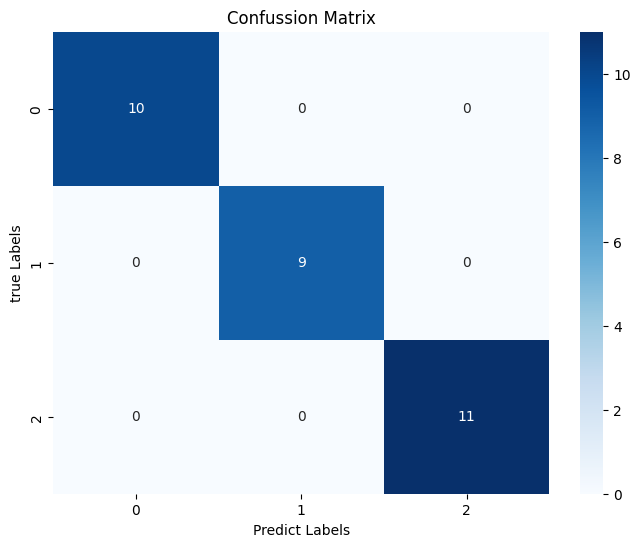

In [17]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print("\nConfussion Matrix:\n", confusion_matrix(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confussion Matrix")
plt.xlabel('Predict Labels')
plt.ylabel('true Labels')
plt.show()

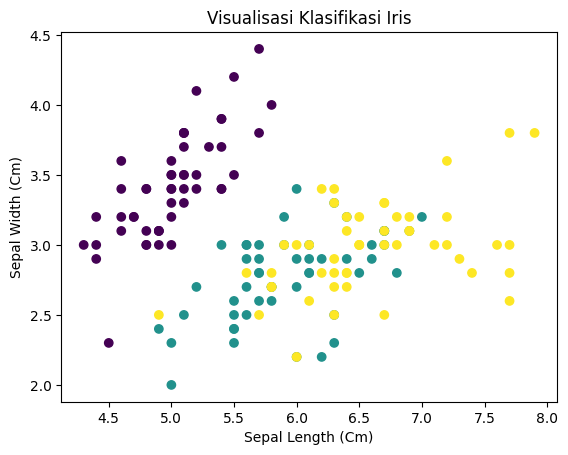

In [18]:
plt.scatter(df['SepalLengthCm'],df['SepalWidthCm'], c=df['Species'].astype('category').cat.codes)
plt.title('Visualisasi Klasifikasi Iris')
plt.xlabel('Sepal Length (Cm)')
plt.ylabel('Sepal Width (Cm)')
plt.show()

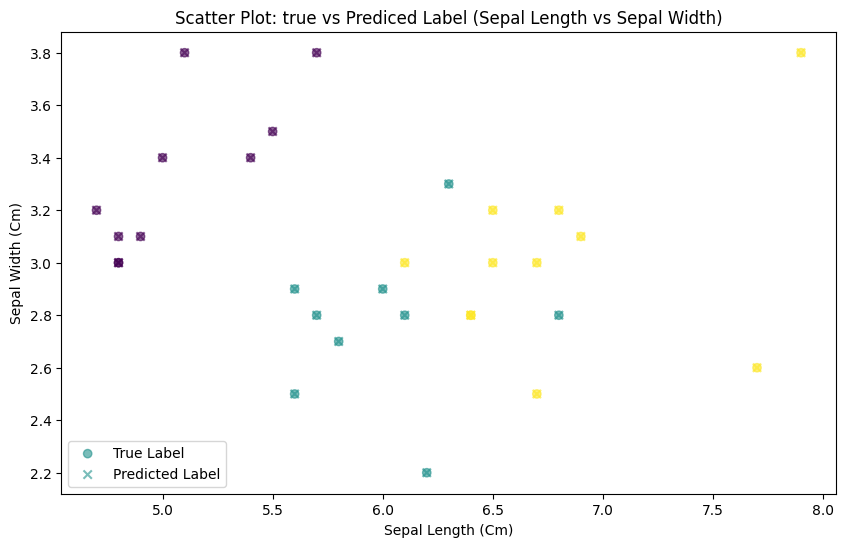

In [25]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)
y_pred_encoded = le.transform(y_pred)

plt.figure(figsize=(10, 6))

plt.scatter(X_test['SepalLengthCm'], X_test['SepalWidthCm'], c=y_test_encoded, cmap='viridis', marker='o', label='True Label', alpha=0.6)

plt.scatter(X_test['SepalLengthCm'], X_test['SepalWidthCm'], c=y_pred_encoded, cmap='viridis', marker='x', label='Predicted Label', alpha=0.6)

plt.xlabel('Sepal Length (Cm)')
plt.ylabel('Sepal Width (Cm)')
plt.title('Scatter Plot: true vs Prediced Label (Sepal Length vs Sepal Width)')
plt.legend()
plt.show()

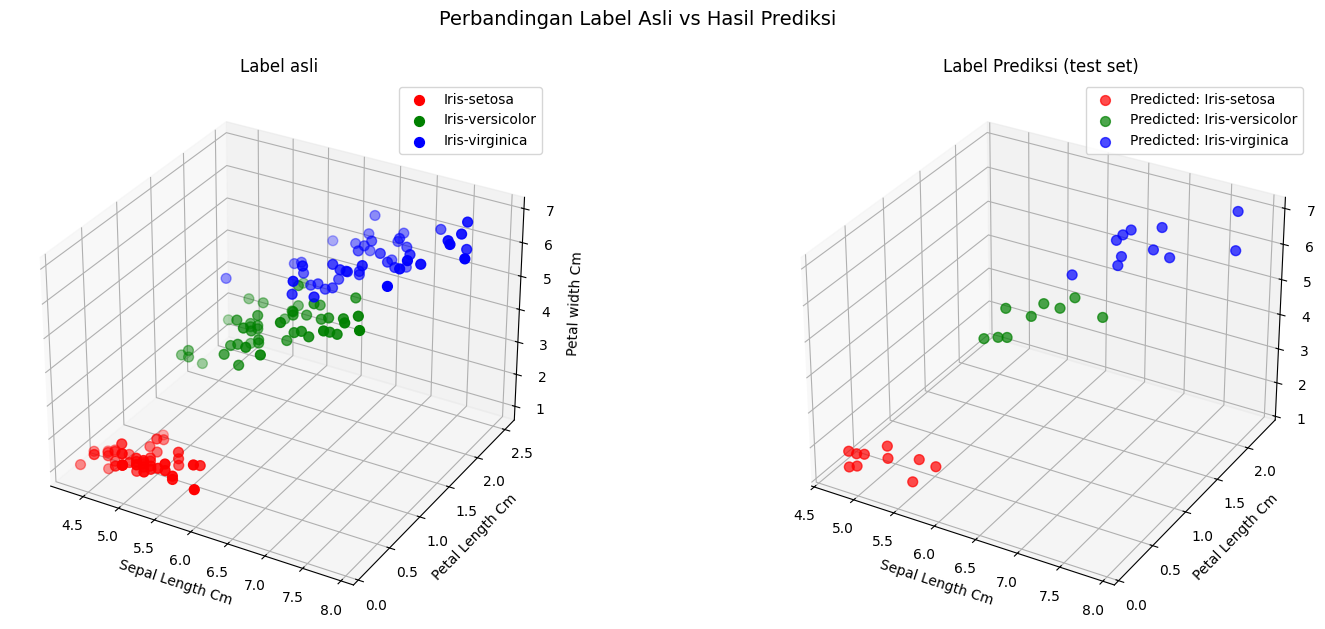

In [38]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# 3. Encocde label (ubah teks jadi angka) - Moved from another cell
le = LabelEncoder()
df['SpeciesEncoded'] =  le.fit_transform(df['Species'])

# warna untuk tiap kelas
color = ['r', 'g', 'b']
labels = le.classes_

fig = plt.figure(figsize=(18,7))

# plot 1 : label asli
axl = fig.add_subplot(121, projection='3d')
for i, species in enumerate(labels):
  subset = df[df['SpeciesEncoded'] == i]
  axl.scatter(
      subset['SepalLengthCm'],
      subset['PetalWidthCm'],
      subset['PetalLengthCm'],
      color=color[i],
      label=species,
      s=50
  )
axl.set_title('Label asli')
axl.set_xlabel('Sepal Length Cm')
axl.set_ylabel('Petal Length Cm')
axl.set_zlabel('Petal width Cm')
axl.legend()

# plot 2 label prediksi
ax2 = fig.add_subplot(122, projection='3d')
# tambahkan hasil prediksi ke dataframe
# create a new column and initialize with none
df['Predicted'] = None
# assign predicted values to the rows that were in the test set
df.loc[X_test.index, 'Predicted'] = y_pred

# visualisasi 3d berdasarkan hasil prediksi
# warna untuk tiap kelas hasil preediksi
# Make sure to usee the encoded predicted labels for coloring
if df['Predicted'].dtype == 'object':
  predicted_encoded = le.transform(df.loc[X_test.index, 'Predicted'])
  df.loc[X_test.index, 'PredictedEncoded'] = predicted_encoded
  plot_column = 'PredictedEncoded'
else:
  plot_column = 'Predicted'

for i, species_label in enumerate(labels):
  subset = df.loc[X_test.index].dropna(subset=[plot_column])
  subset = subset[subset[plot_column] == i]

  ax2.scatter(
      subset['SepalLengthCm'],
      subset['PetalWidthCm'],
      subset['PetalLengthCm'],
      color=color[i],
      label=f"Predicted: {species_label}",
      s=50,
      alpha=0.7
  )

  ax2.set_title('Label Prediksi (test set)')
  ax2.set_xlabel('Sepal Length Cm')
  ax2.set_ylabel('Petal Length Cm')
  ax2.set_zlabel('Petal Width Cm')
  ax2.legend()

plt.suptitle('Perbandingan Label Asli vs Hasil Prediksi', fontsize=14)
plt.show()